## Analysis Challenge

Using the data from the 2 .csv files, the task is to estimate how much revenues we can expect in 2023 and how many unique patients we will have acquired by the end of 2023. Take into account that we will launch one clinic in March 2023, and another one in July 2023. The 2 already existing clinics will keep running in 2023.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading two csv files

data_1 = pd.read_csv('p21_bi_intern_test_appointments.csv')

data_2 = pd.read_csv('p21_bi_intern_test_revenues.csv')

# using merge function by inner joining the 2 datasets

data = pd.merge(data_1, data_2, 
                   on='appointment_id', 
                   how='inner')

data

,appointment_id,practitioner_id,patient_id,clinic_id,appointment_date,revenues
0,0004df0d-3df6-42be-9d68-b646a42a44bb,c7402157-ae44-45cc-b6a7-b348d5dbd417,158184,2,2022-12-22,299.17
1,000a978e-f134-47b3-ab9e-4f56084be38e,3ca4793d-065e-4112-b023-d1122a2a4b44,112887,2,2022-06-02,124.51
2,000c1615-0980-4933-9ad1-6f34bb5e188e,c7402157-ae44-45cc-b6a7-b348d5dbd417,141451,2,2022-10-18,85.31
3,000d8c91-e6a8-4404-bf8b-4951ed8ca1f2,2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1,37516,1,2022-01-06,116.40
4,0015acc2-484c-491a-b455-0963835a31dd,ed1a5b13-3dc5-4212-b989-f59258b4410e,141833,2,2022-10-14,299.70
...,...,...,...,...,...,...
11010,ffe5ef65-a922-416e-ab3f-edd7155fc9c8,c7402157-ae44-45cc-b6a7-b348d5dbd417,121442,2,2022-08-10,336.45
11011,ffe61232-0eb1-478e-a95d-238f2e424c5e,3ca4793d-065e-4112-b023-d1122a2a4b44,115034,2,2022-05-19,55.85
11012,ffec22fc-a246-4432-9b9c-448ba57044a8,2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1,23279,1,2022-07-11,143.60
11013,ffef4a4a-a15b-4820-8b50-861f1c26c666,c7402157-ae44-45cc-b6a7-b348d5dbd417,70565,2,2022-02-09,129.42


In [3]:
# Preprocessing data.

data.info()

data.describe()

data.isnull().sum()

# Fill missing revenues with the mean revenue

data['revenues'].fillna(data['revenues'].mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appointment_id    11015 non-null  object 
 1   practitioner_id   11015 non-null  object 
 2   patient_id        11015 non-null  int64  
 3   clinic_id         11015 non-null  int64  
 4   appointment_date  11015 non-null  object 
 5   revenues          10902 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 516.5+ KB


In [4]:
# convert to date

data['appointment_date'] = pd.to_datetime(data['appointment_date'])
data


,appointment_id,practitioner_id,patient_id,clinic_id,appointment_date,revenues
0,0004df0d-3df6-42be-9d68-b646a42a44bb,c7402157-ae44-45cc-b6a7-b348d5dbd417,158184,2,2022-12-22,299.17
1,000a978e-f134-47b3-ab9e-4f56084be38e,3ca4793d-065e-4112-b023-d1122a2a4b44,112887,2,2022-06-02,124.51
2,000c1615-0980-4933-9ad1-6f34bb5e188e,c7402157-ae44-45cc-b6a7-b348d5dbd417,141451,2,2022-10-18,85.31
3,000d8c91-e6a8-4404-bf8b-4951ed8ca1f2,2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1,37516,1,2022-01-06,116.40
4,0015acc2-484c-491a-b455-0963835a31dd,ed1a5b13-3dc5-4212-b989-f59258b4410e,141833,2,2022-10-14,299.70
...,...,...,...,...,...,...
11010,ffe5ef65-a922-416e-ab3f-edd7155fc9c8,c7402157-ae44-45cc-b6a7-b348d5dbd417,121442,2,2022-08-10,336.45
11011,ffe61232-0eb1-478e-a95d-238f2e424c5e,3ca4793d-065e-4112-b023-d1122a2a4b44,115034,2,2022-05-19,55.85
11012,ffec22fc-a246-4432-9b9c-448ba57044a8,2ea0ca2a-77fc-4447-b57c-62a6cb4d75a1,23279,1,2022-07-11,143.60
11013,ffef4a4a-a15b-4820-8b50-861f1c26c666,c7402157-ae44-45cc-b6a7-b348d5dbd417,70565,2,2022-02-09,129.42


# Analyze the historical trends in appointments and revenues.

In [5]:
# Extract year and month from appointment_date

data['year'] = data['appointment_date'].dt.year
data['month'] = data['appointment_date'].dt.month

# Group by year and month to get monthly statistics

monthly_data = data.groupby(['year', 'month']).agg({
    'appointment_id': 'count',
    'revenues': 'sum',
    'patient_id': pd.Series.nunique
}).reset_index()

monthly_data.rename(columns={'appointment_id': 'appointments', 'patient_id': 'unique_patients'}, inplace=True)

# Display monthly data

print(monthly_data)

    year  month  appointments       revenues  unique_patients
0   2022      1           717   99547.155975              499
1   2022      2           760  125751.650991              510
2   2022      3           763  154151.282956              515
3   2022      4           821  148159.243978              555
4   2022      5           829  146113.471966              582
5   2022      6           715  162060.373978              536
6   2022      7           875  182548.273978              631
7   2022      8           889  139909.972956              644
8   2022      9          1063  186636.266966              740
9   2022     10          1147  182201.089984              769
10  2022     11          1196  194574.867972              816
11  2022     12          1240  202358.393947              888


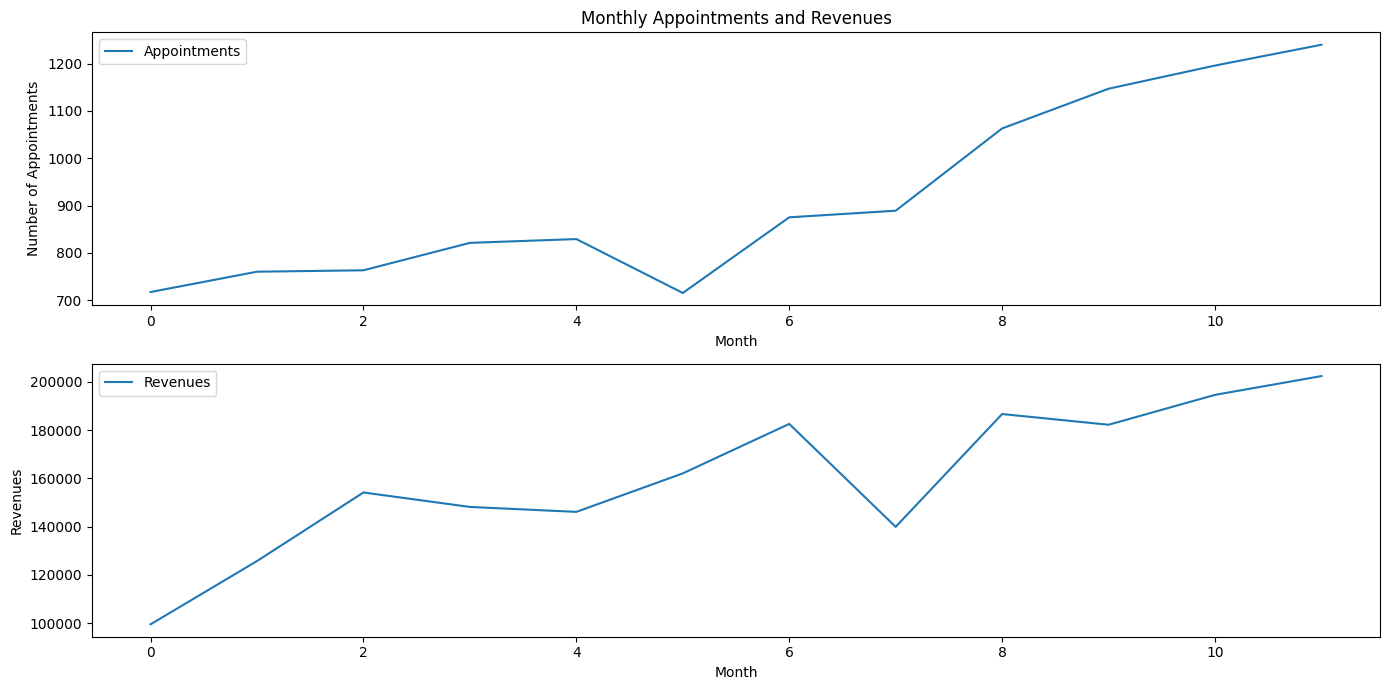

In [6]:
# Plot historical trends

plt.figure(figsize=(14, 7))

# Appointments trend

plt.subplot(2, 1, 1)
plt.plot(monthly_data['appointments'], label='Appointments')
plt.title('Monthly Appointments and Revenues')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.legend()

# Revenues trend

plt.subplot(2, 1, 2)
plt.plot(monthly_data['revenues'], label='Revenues')
plt.xlabel('Month')
plt.ylabel('Revenues')
plt.legend()

plt.tight_layout()
plt.show()

# Forecasting

Lets assume that each new clinic increases appointments by a certain percentage. The mean monthly growth rate is calculated by (current_value-previous_value)/previous_value * 100. Then the forecasting is performed.

In [7]:

existing_clinics = 2
new_clinics_march = 1
new_clinics_july = 1

# Calculate monthly growth rate based on data history

monthly_growth_rate_appointments = monthly_data['appointments'].pct_change().mean()
monthly_growth_rate_revenues = monthly_data['revenues'].pct_change().mean()

In [8]:
# Initialize forecast data for 2023

forecast_2023 = []

months_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')
print(months_2023)

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')


# Estimating Revenues

In [9]:
# Start with December 2022 data

last_appointments = monthly_data[(monthly_data['year'] == 2022) & (monthly_data['month'] == 12)]['appointments'].values[0]
last_revenues = monthly_data[(monthly_data['year'] == 2022) & (monthly_data['month'] == 12)]['revenues'].values[0]

for month in months_2023:
    
    month_num = month.month
    
    if month_num >= 3:
        new_clinics = existing_clinics + new_clinics_march
    if month_num >= 7:
        new_clinics = existing_clinics + new_clinics_march + new_clinics_july
    else:
        new_clinics = existing_clinics

    # Apply growth rate and adjust for new clinics
    
    last_appointments = last_appointments * (1 + monthly_growth_rate_appointments) * (new_clinics / existing_clinics)
    last_revenues = last_revenues * (1 + monthly_growth_rate_revenues) * (new_clinics / existing_clinics)

    forecast_2023.append({
        'year': 2023,
        'month': month_num,
        'appointments': last_appointments,
        'revenues': last_revenues
    })

forecast_2023_df = pd.DataFrame(forecast_2023)
forecast_2023_df

,year,month,appointments,revenues
0,2023,1,1308.334954,2.181150e+05
1,2023,2,1380.435767,2.350984e+05
2,2023,3,1456.509972,2.534043e+05
3,2023,4,1536.776538,2.731356e+05
4,2023,5,1621.466500,2.944032e+05
5,2023,6,1710.823628,3.173268e+05
6,2023,7,3610.210245,6.840707e+05
7,2023,8,7618.329442,1.474671e+06
8,2023,9,16076.333383,3.178993e+06
9,2023,10,33924.562729,6.853048e+06


# Estimating Unique Patients

In [10]:
# Assuming the number of unique patients grows similarly to the number of appointments

unique_patients_growth_rate = monthly_data['unique_patients'].pct_change().mean()

# Calculate the number of unique patients for 2023

last_unique_patients = monthly_data[(monthly_data['year'] == 2022) & (monthly_data['month'] == 12)]['unique_patients'].values[0]

forecast_unique_patients_2023 = []

for month in months_2023:
    
    last_unique_patients = last_unique_patients * (1 + unique_patients_growth_rate) * (new_clinics / existing_clinics)
    forecast_unique_patients_2023.append(last_unique_patients)

forecast_2023_df['unique_patients'] = forecast_unique_patients_2023
forecast_2023_df

,year,month,appointments,revenues,unique_patients
0,2023,1,1308.334954,2.181150e+05,1.875227e+03
1,2023,2,1380.435767,2.350984e+05,3.959995e+03
2,2023,3,1456.509972,2.534043e+05,8.362488e+03
3,2023,4,1536.776538,2.731356e+05,1.765942e+04
4,2023,5,1621.466500,2.944032e+05,3.729213e+04
5,2023,6,1710.823628,3.173268e+05,7.875137e+04
6,2023,7,3610.210245,6.840707e+05,1.663026e+05
7,2023,8,7618.329442,1.474671e+06,3.511881e+05
8,2023,9,16076.333383,3.178993e+06,7.416187e+05
9,2023,10,33924.562729,6.853048e+06,1.566107e+06


# Final results

In [11]:
total_revenues_2023 = forecast_2023_df['revenues'].sum()
total_unique_patients_2023 = forecast_2023_df['unique_patients'].iloc[-1]

print(f"Estimated total revenues for 2023: ${total_revenues_2023:,.2f}")
print(f"Estimated unique patients by end of 2023: {int(total_unique_patients_2023)}")

Estimated total revenues for 2023: $60,402,857.50
Estimated unique patients by end of 2023: 6983983
